<a href="https://colab.research.google.com/github/ajaciubek/wine_predictor/blob/main/wine_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
from io import StringIO
from typing import Optional
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")

X = df.drop(columns=["quality"])
y = df["quality"]

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


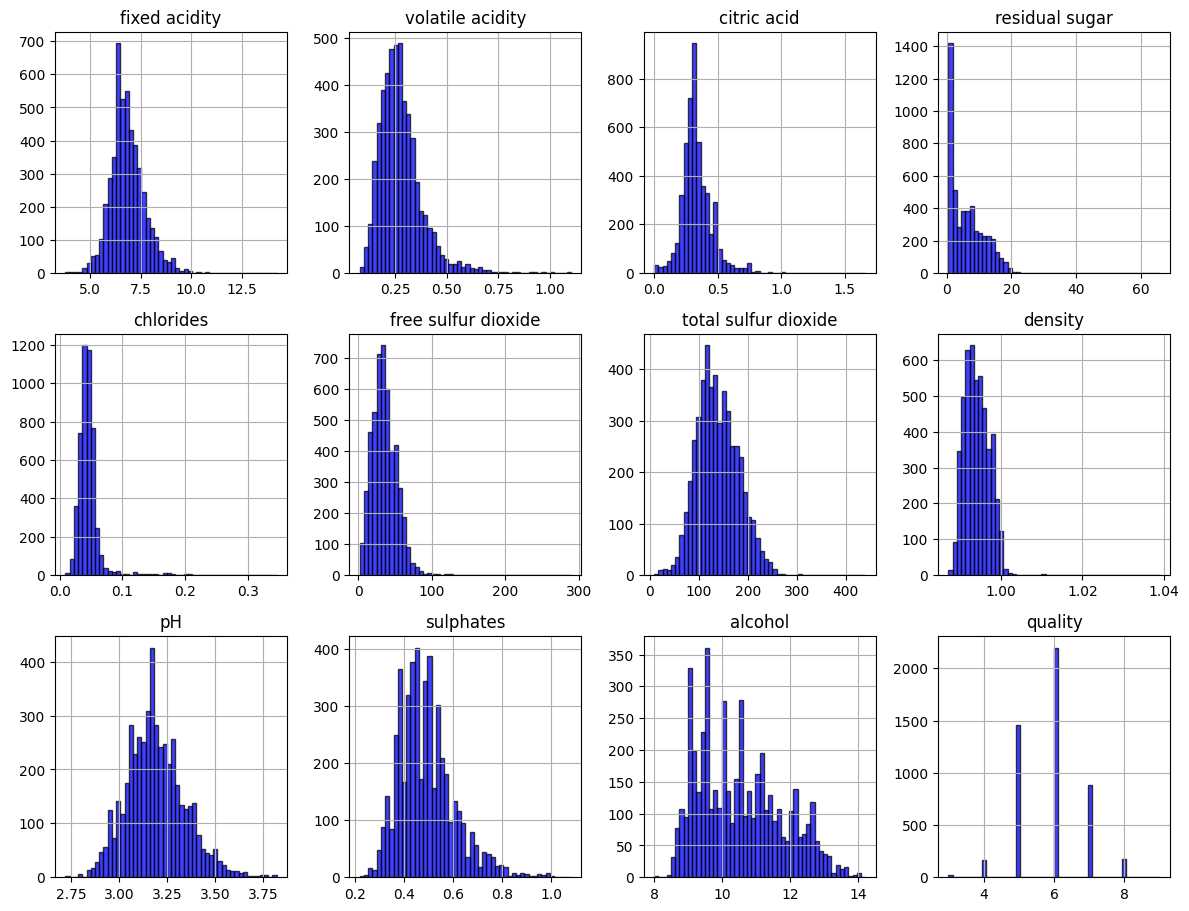

In [ ]:
def create_plot(source : pd.DataFrame):
  num_columns = len(source.columns)
  rows = cols = int(np.ceil(np.sqrt(num_columns)))  # Określamy liczbę wierszy i kolumn

  fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

  for ax, col in zip(axes.flat, df.columns):
      ax.hist(source[col], bins=50, alpha=0.75, color='blue', edgecolor='black')
      ax.set_title(f'{col}')
      ax.grid(True)

  for i in range(num_columns, rows * cols):
      fig.delaxes(axes.flat[i])

  plt.tight_layout()
  plt.show()

create_plot(df)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sgd_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('sgdclassifier', SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42))
])

sgd_pipeline.fit(x_train, y_train)
y_pred = sgd_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# print(classification_report(y_test, y_pred))
# confusion_matrix(y_test, y_pred)

0.5102040816326531


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

forrest_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('randomforestclassifier', RandomForestClassifier())
])

forrest_pipeline.fit(x_train, y_train)
y_pred = forrest_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# print(classification_report(y_test, y_pred))
# confusion_matrix(y_test, y_pred)

0.6642857142857143


In [ ]:
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(y.shape[1], activation="softmax")
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,383 (21.03 KB)

 Trainable params: 5,383 (21.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=8)

Epoch 1/15
490/490 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4831 - loss: 1.3304 - val_accuracy: 0.5490 - val_loss: 1.1056
Epoch 2/15
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5621 - loss: 1.0621 - val_accuracy: 0.5571 - val_loss: 1.0781
Epoch 3/15
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5770 - loss: 1.0148 - val_accuracy: 0.5541 - val_loss: 1.0777
Epoch 4/15
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5908 - loss: 0.9899 - val_accuracy: 0.5449 - val_loss: 1.0710
Epoch 5/15
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5785 - loss: 0.9868 - val_accuracy: 0.5469 - val_loss: 1.0572
Epoch 6/15
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5789 - loss: 0.9864 - val_accuracy: 0.5469 - val_loss: 1.0656
Epoch 7/15
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5883 - loss: 0.9473 - val_accuracy: 0.5653 - val_loss: 1.0616
Epoch 8/15
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5990 - loss: 0.9508 - val_accuracy: 0.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5717 - loss: 1.0726
Test Accuracy: 0.5622
